In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
#Load and split the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() 
#Normalize pixle values to be between 0 and 1

train_images , test_images = train_images/255.0, test_images /255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

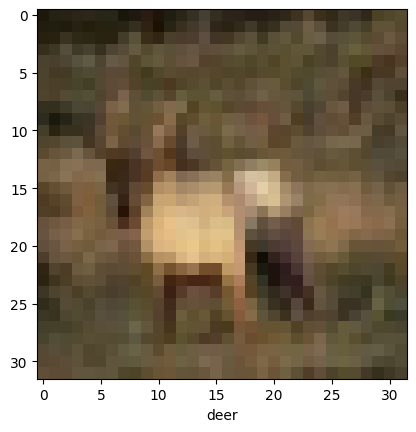

In [3]:
img_index = 3

plt.imshow(train_images[img_index], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[img_index][0]])
plt.show()

# CNN Architecture

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Training

In [8]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                   validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4970 - accuracy: 0.4523 - val_loss: 1.2265 - val_accuracy: 0.5573
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1306 - accuracy: 0.6004 - val_loss: 1.0642 - val_accuracy: 0.6178
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9809 - accuracy: 0.6551 - val_loss: 0.9607 - val_accuracy: 0.6608
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8808 - accuracy: 0.6914 - val_loss: 0.9339 - val_accuracy: 0.6727
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8048 - accuracy: 0.7194 - val_loss: 0.8947 - val_accuracy: 0.6880
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7453 - accuracy: 0.7401 - val_loss: 0.9194 - val_accuracy: 0.6873
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6897 - accuracy: 0.7581 - val_loss: 0.8507 -

# Evaluating The Model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8717 - accuracy: 0.7154 - 4s/epoch - 11ms/step
0.715399980545044


# Data Augmentation

<function matplotlib.pyplot.show(close=None, block=None)>

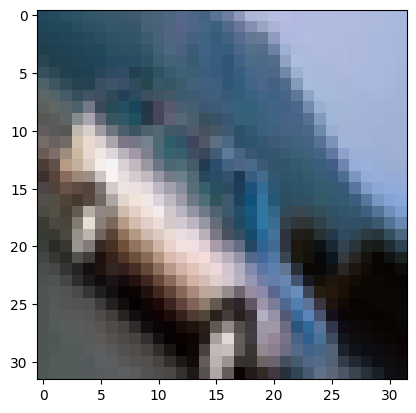

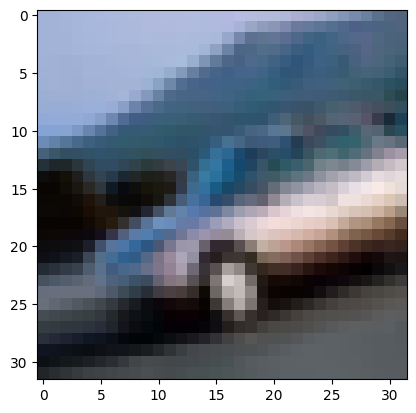

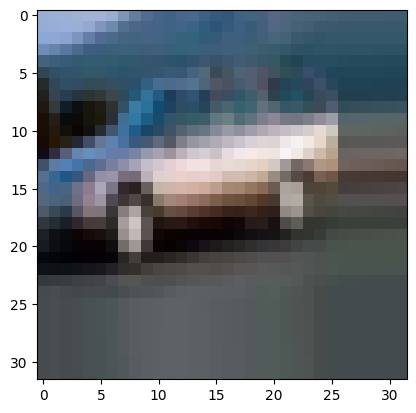

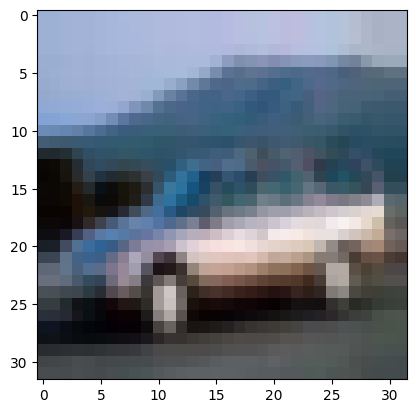

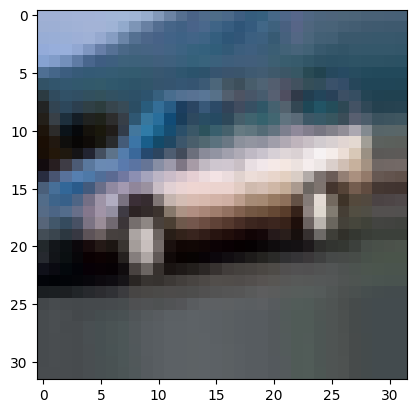

In [10]:
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

#creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range =40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

#pick image to transform
test_img = train_images[4]
img = img_to_array(test_img) #Convert image to numpy array
img = img.reshape((1,)+img.shape) #reshape image

i = 0
#This loop runs forever until we break, saving images to the current directory
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(img_to_array(batch[0]))
    i += 1
    if i > 4:
        break
        
plt.show



# Using the Pretrained Model

In [14]:
IMG_SHAPE = (160, 160, 3)

#create the base model from pretrained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top = False,
                                              weights='imagenet')

9406464/9406464 [==============================] - 206s 22us/step


In [15]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [16]:
for image, _ in train_batches.take(1):
    pass
feature_batch = base_model(image)
print(feature_batch.shape)

NameError: name 'train_batches' is not defined

In [17]:
for img, label in raw_train.take(2):
    print("Original shape:", img.shape)
    
for img, label in raw_train.take(2):
    print("New shape:", img.shape)

NameError: name 'raw_train' is not defined